In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler


In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


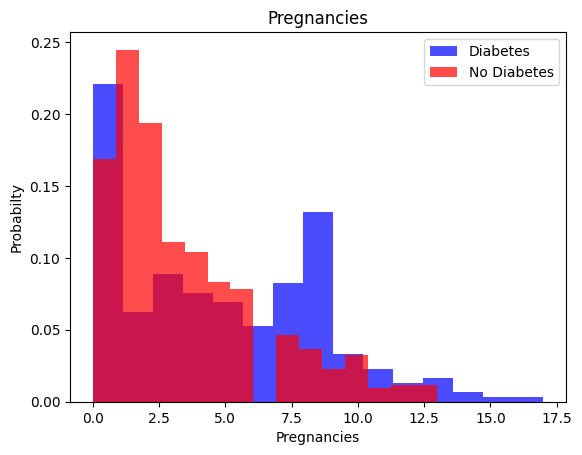

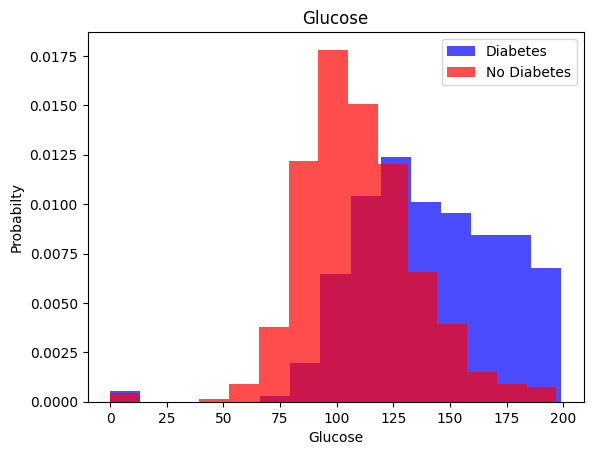

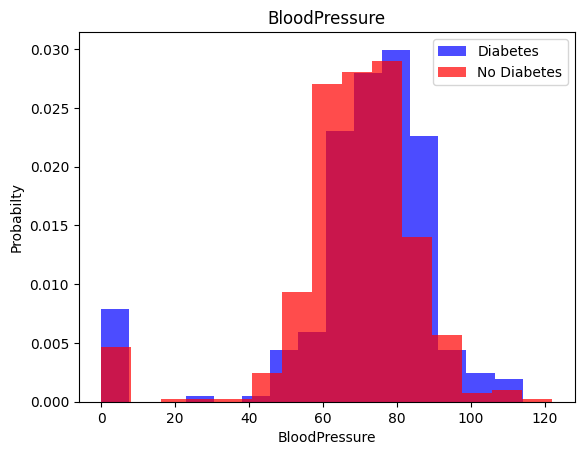

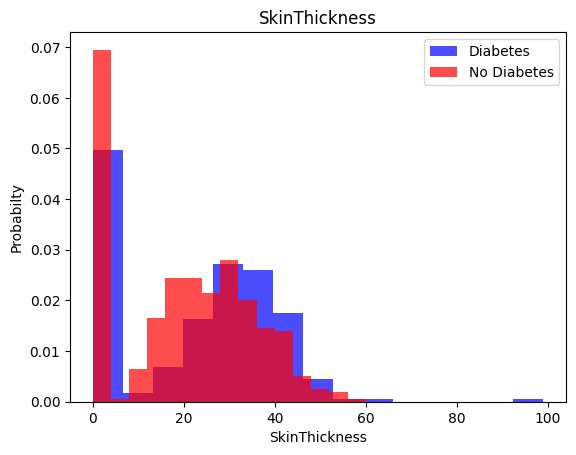

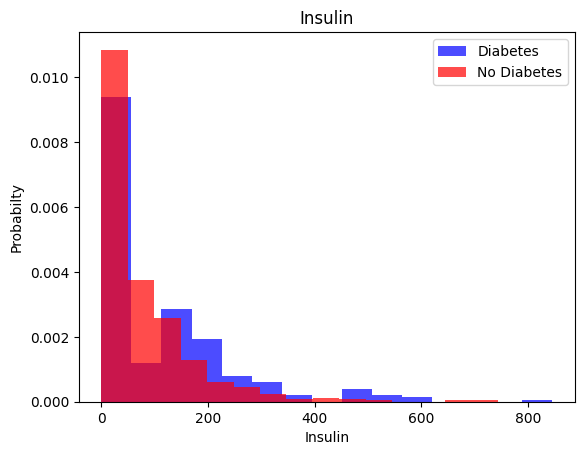

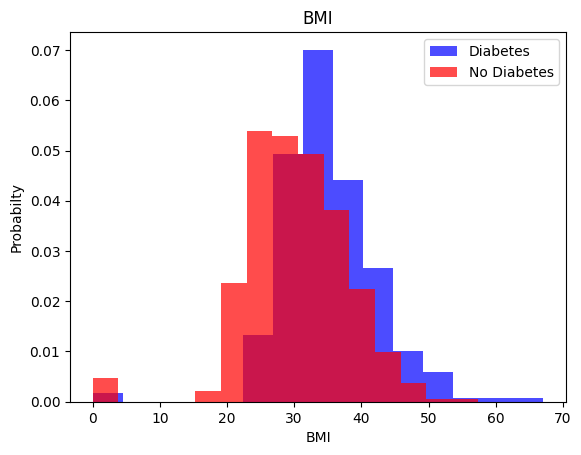

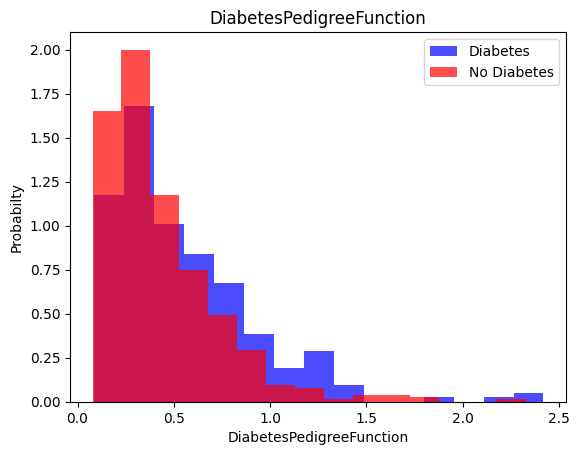

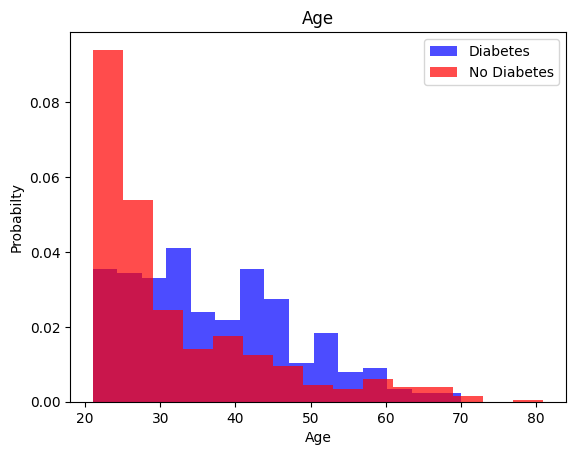

In [ ]:
for i in range(len(df.columns[:-1])):
  label= df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetes', alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color ='red', label='No Diabetes', alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel('Probabilty')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [ ]:
x.shape, y.shape

((768, 8), (768,))

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns= df.columns)

In [ ]:
over = RandomOverSampler()
x,y = over.fit_resample(x,y)
data = np.hstack((x, np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns= df.columns)

In [ ]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0]), 

(500, 500)

In [ ]:
x_train, x_temp,y_train, y_temp=train_test_split(x,y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test=train_test_split(x_temp,y_temp, test_size=0.5, random_state=0)



In [ ]:
model= tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(x_train, y_train)

19/19 [==============================] - 1s 2ms/step - loss: 0.7931 - accuracy: 0.4733


[0.7930616736412048, 0.47333332896232605]

In [ ]:
model.fit(x_train,y_train, batch_size=16, epochs=20, validation_data=(x_valid,y_valid))

Epoch 1/20
38/38 [==============================] - 1s 5ms/step - loss: 0.7062 - accuracy: 0.5667 - val_loss: 0.6540 - val_accuracy: 0.5850
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6287 - accuracy: 0.6583 - val_loss: 0.6257 - val_accuracy: 0.6200
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5957 - accuracy: 0.6950 - val_loss: 0.5999 - val_accuracy: 0.6400
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5731 - accuracy: 0.7133 - val_loss: 0.5855 - val_accuracy: 0.6700
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.7250 - val_loss: 0.5725 - val_accuracy: 0.7150
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5423 - accuracy: 0.7333 - val_loss: 0.5587 - val_accuracy: 0.7350
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5330 - accuracy: 0.7467 - val_loss: 0.5493 - val_accuracy: 0.7400
Epoch 8/20
38/38 [==

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.4734 - accuracy: 0.7700


[0.4733927845954895, 0.7699999809265137]